# Acoustic and Visual Data Preprocessing

In [1]:
import os
from glob import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

## Path setup

In [2]:
here = os.getcwd()

video_dir = os.path.join(here, "data")
audio_dir = os.path.join(video_dir, "audios")
audio_features_dir = os.path.join(video_dir, "audio_features")
face_features_dir = os.path.join(video_dir, "face_features")

figures_dir = os.path.join(here, "figures", "lab1")

video_ids = [os.path.split(file)[1][:-4] for file in glob(os.path.join(video_dir, "*.mp4"))]

In [3]:
video_ids

['k4vzhweOefs',
 'lr-mXnUoUXM',
 'O6jrLgvCUNs',
 'ovKqmRyOGcg',
 'psN1DORYYV0',
 'tZYkjaKNr_o',
 'XE_FPEFpHt4',
 'yCm9Ng0bbEQ',
 'zawpbVpu5nY',
 'ZdDjexbxVzM']

## Video feature analysis

In [4]:
def read_face_features(video_id):
    csv_path = os.path.join(face_features_dir, f"{video_id}.csv")
    df = pd.read_csv(csv_path, 
                     sep=",", 
                     dtype={
                         "frame": int,
                         " face_id": int,
                         " success": int})
    # Remove spaces from column names
    df.columns = df.columns.str.strip()

    # Get frames with no face
    non_success_frames = list(df[df['success'] == 0]['frame'])
    
    return df, non_success_frames

def plot_AU(df, video_id, plot_window=None, AU='01_r', median_filters=[3, 5, 7]):
    
    au_col = f'AU{AU}'
    
    # Filter by frame window, recover only AU of interest
    if plot_window is not None:
        au_raw = df[(df['frame'] >= plot_window[0]) & (df['frame'] <= plot_window[1])][au_col]
    else:
        au_raw = df[au_col]
    
    # Compute median filters if specified
    filters = []
    for window_size in median_filters:
        filters.append(au_raw.rolling(window_size, center=True).median())
    
    # Make plot
    fig, ax = plt.subplots(figsize=(15, 6), tight_layout=True, dpi=400.0, facecolor='white')
    
    # Plot raw series and eventual filters
    ax.plot(au_raw, label=f'raw')
    for i, fil in enumerate(filters):
        ax.plot(fil, label=f'{median_filters[i]} median filter')
    
    # Fill plot legends, title, labels
    ax.legend()
    if plot_window is not None:
        ax.set_title(f'{au_col} in video {video_id} (frames {plot_window[0]}-{plot_window[1]})')
    else:
        ax.set_title(f'{au_col} in video {video_id}')
    ax.set_ylabel('Magnitude')
    ax.set_xlabel('Frame')
    
    # Strings for filename encoding
    med_string = '-'.join(map(str, median_filters))
    if plot_window is not None:
        fr_string = '-'.join(map(str, plot_window))
    else:
        fr_string = ''
    
    # Make filename to save png
    plot_fname = f'{video_id}__{au_col}__m{med_string}__f{fr_string}.png'
    
    # Check figures_dir exists and make it otherwise
    os.makedirs(figures_dir, exist_ok=True)
    
    # Save figure and show
    fig.savefig(os.path.join(figures_dir, plot_fname))
    plt.show()

In [5]:
dfs = []
frames = []

for video_id in video_ids:
    df, non_success_frames = read_face_features(video_id)
    
    dfs.append(df)
    frames.append(non_success_frames)

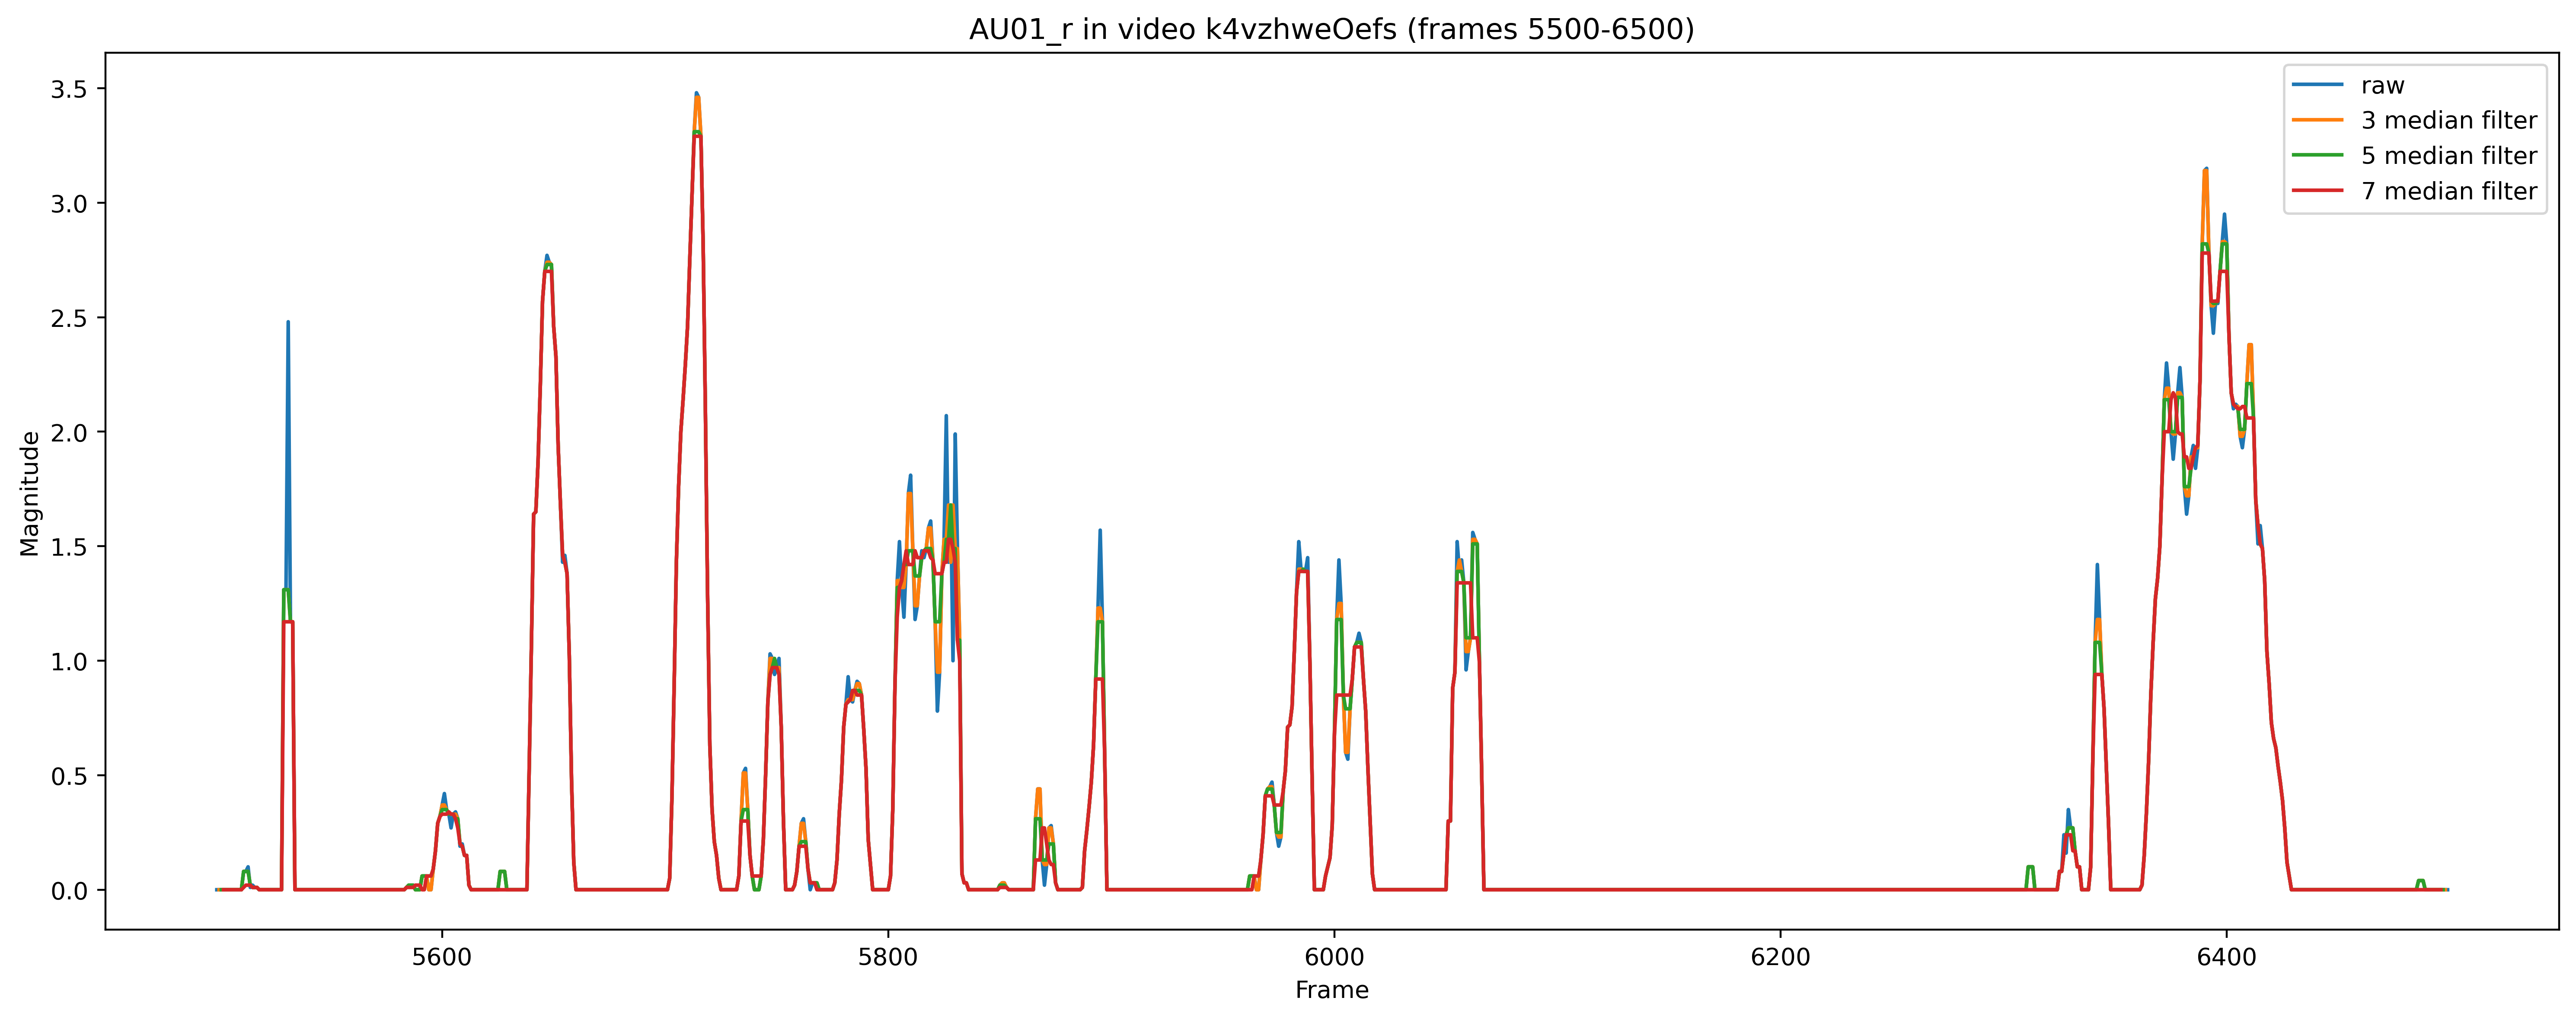

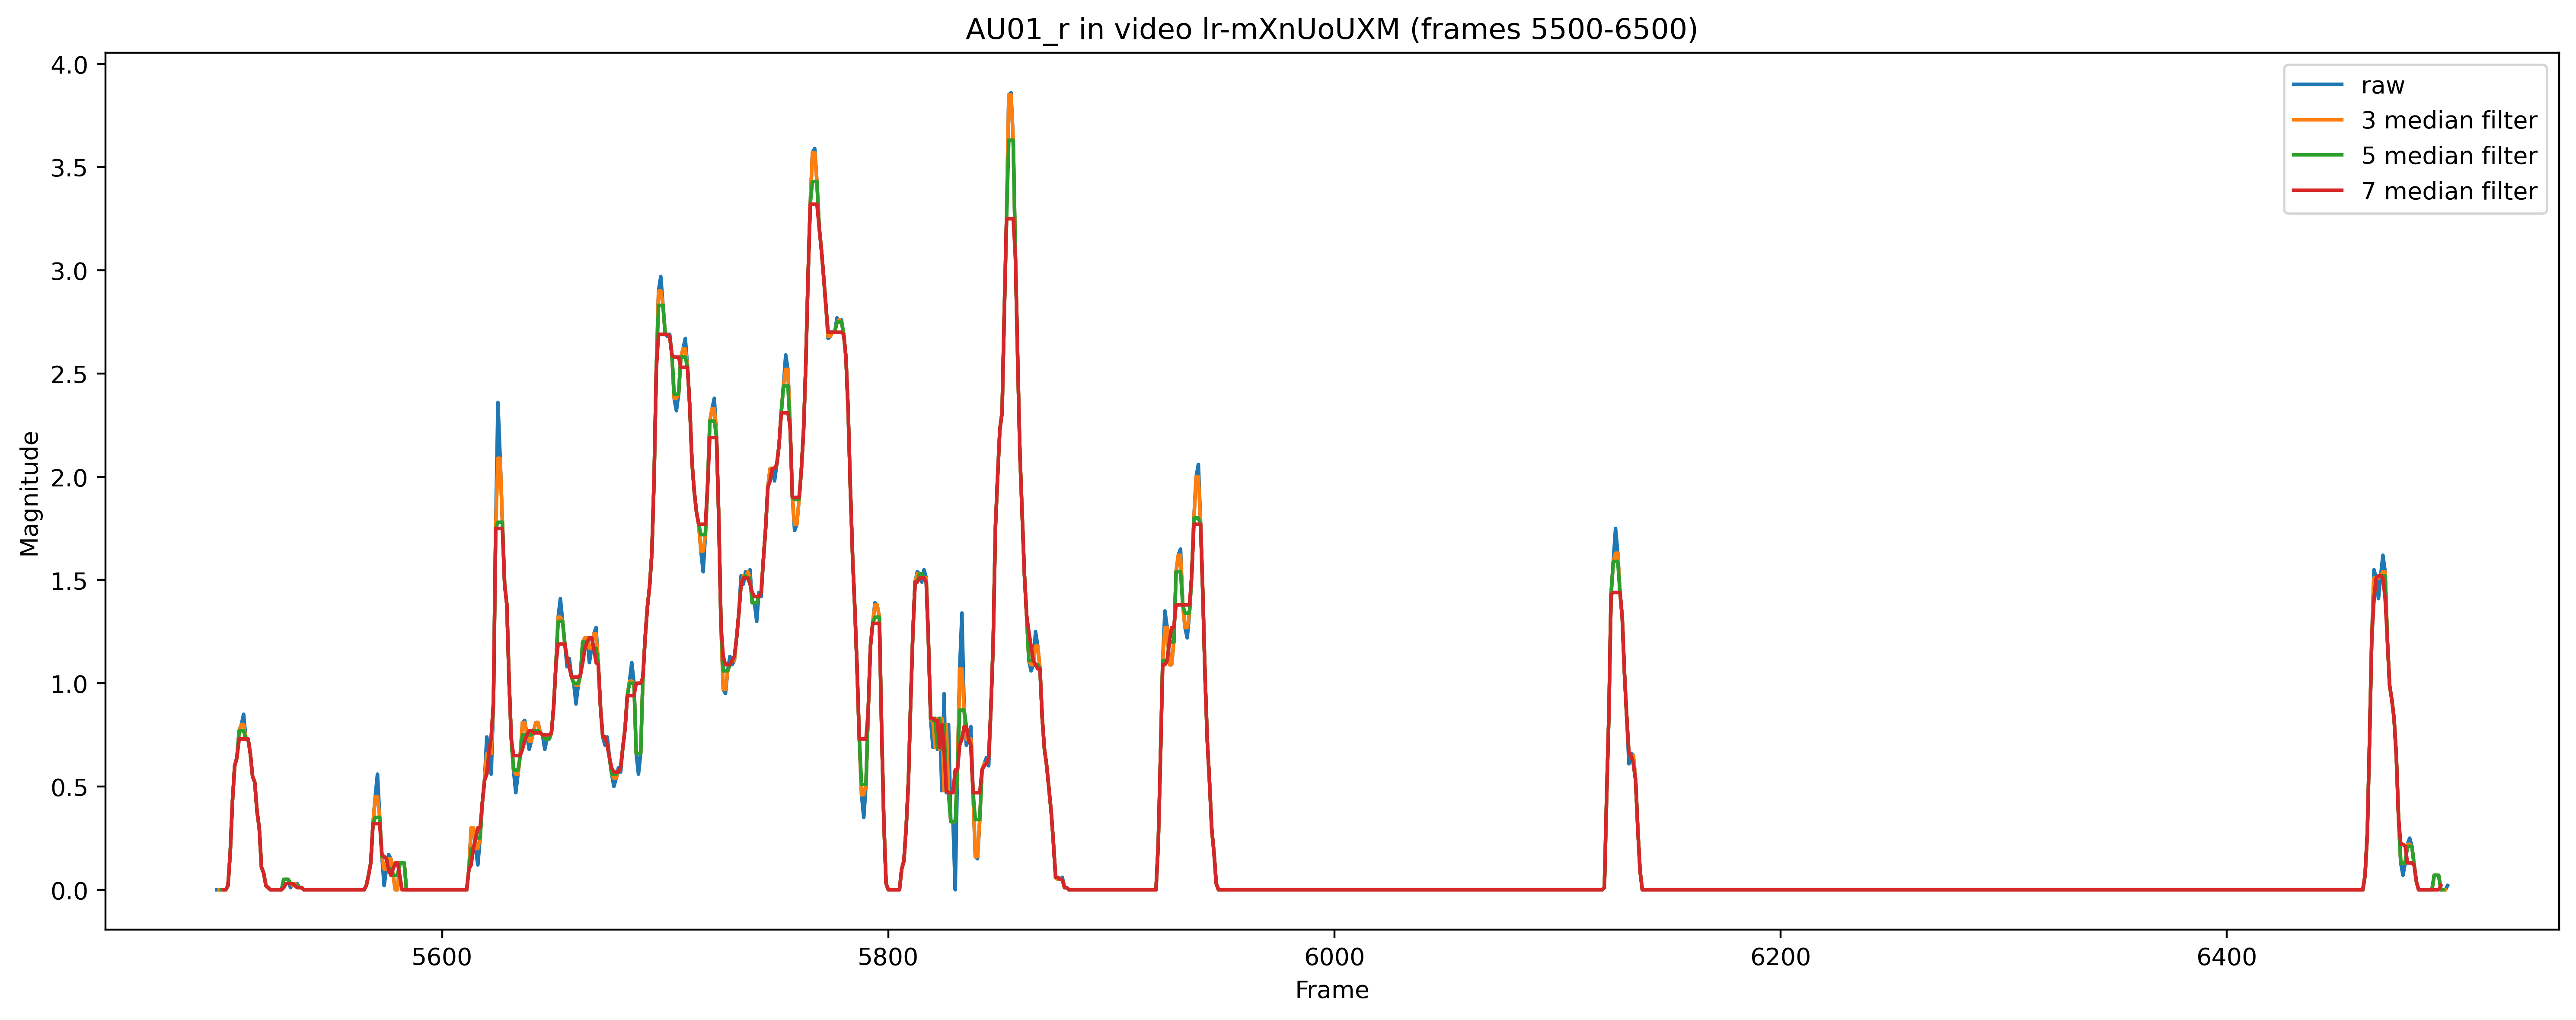

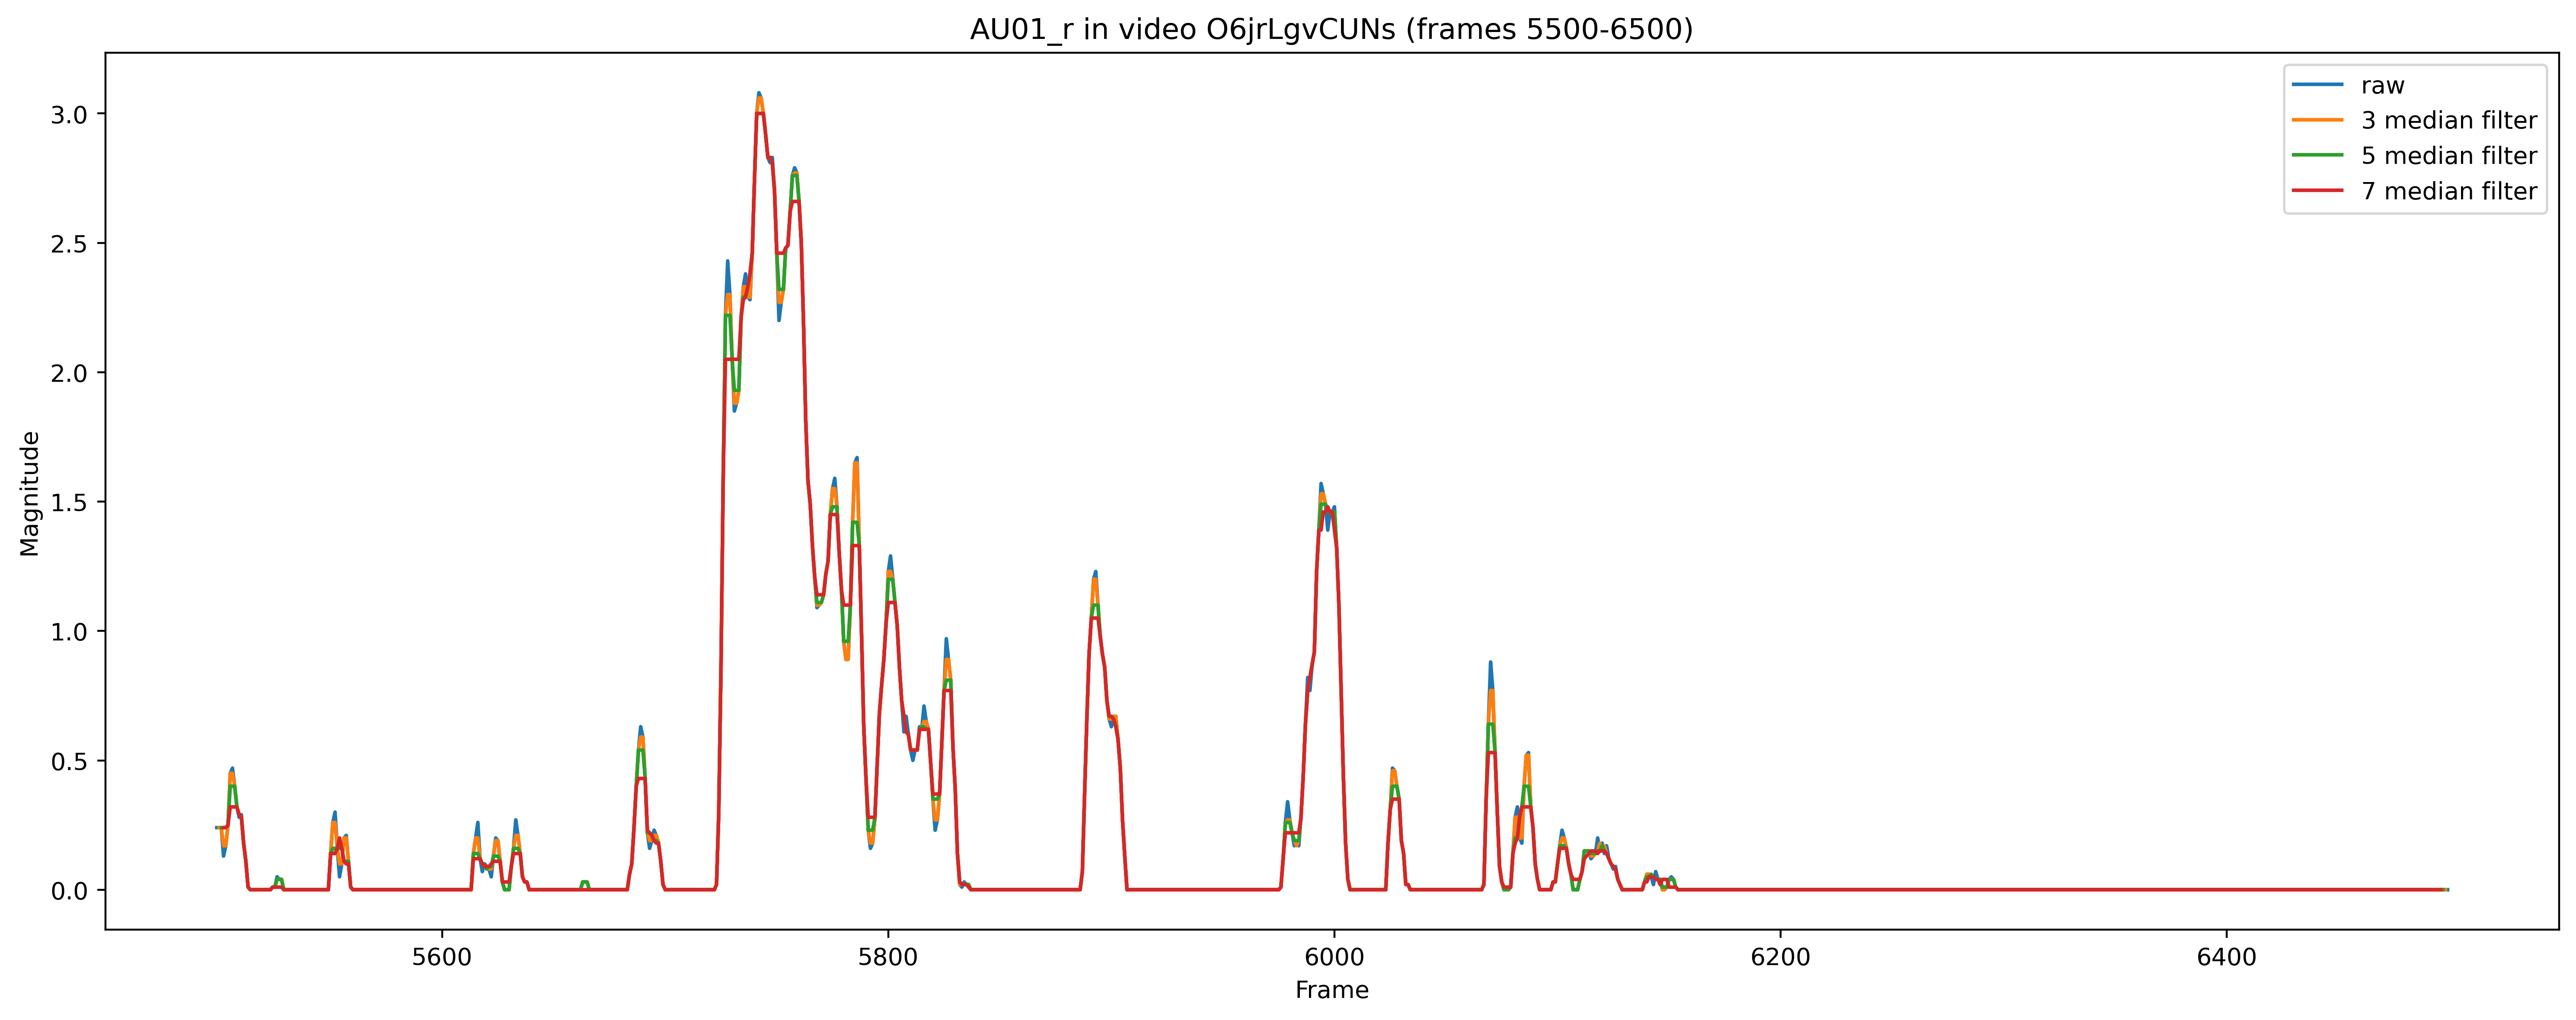

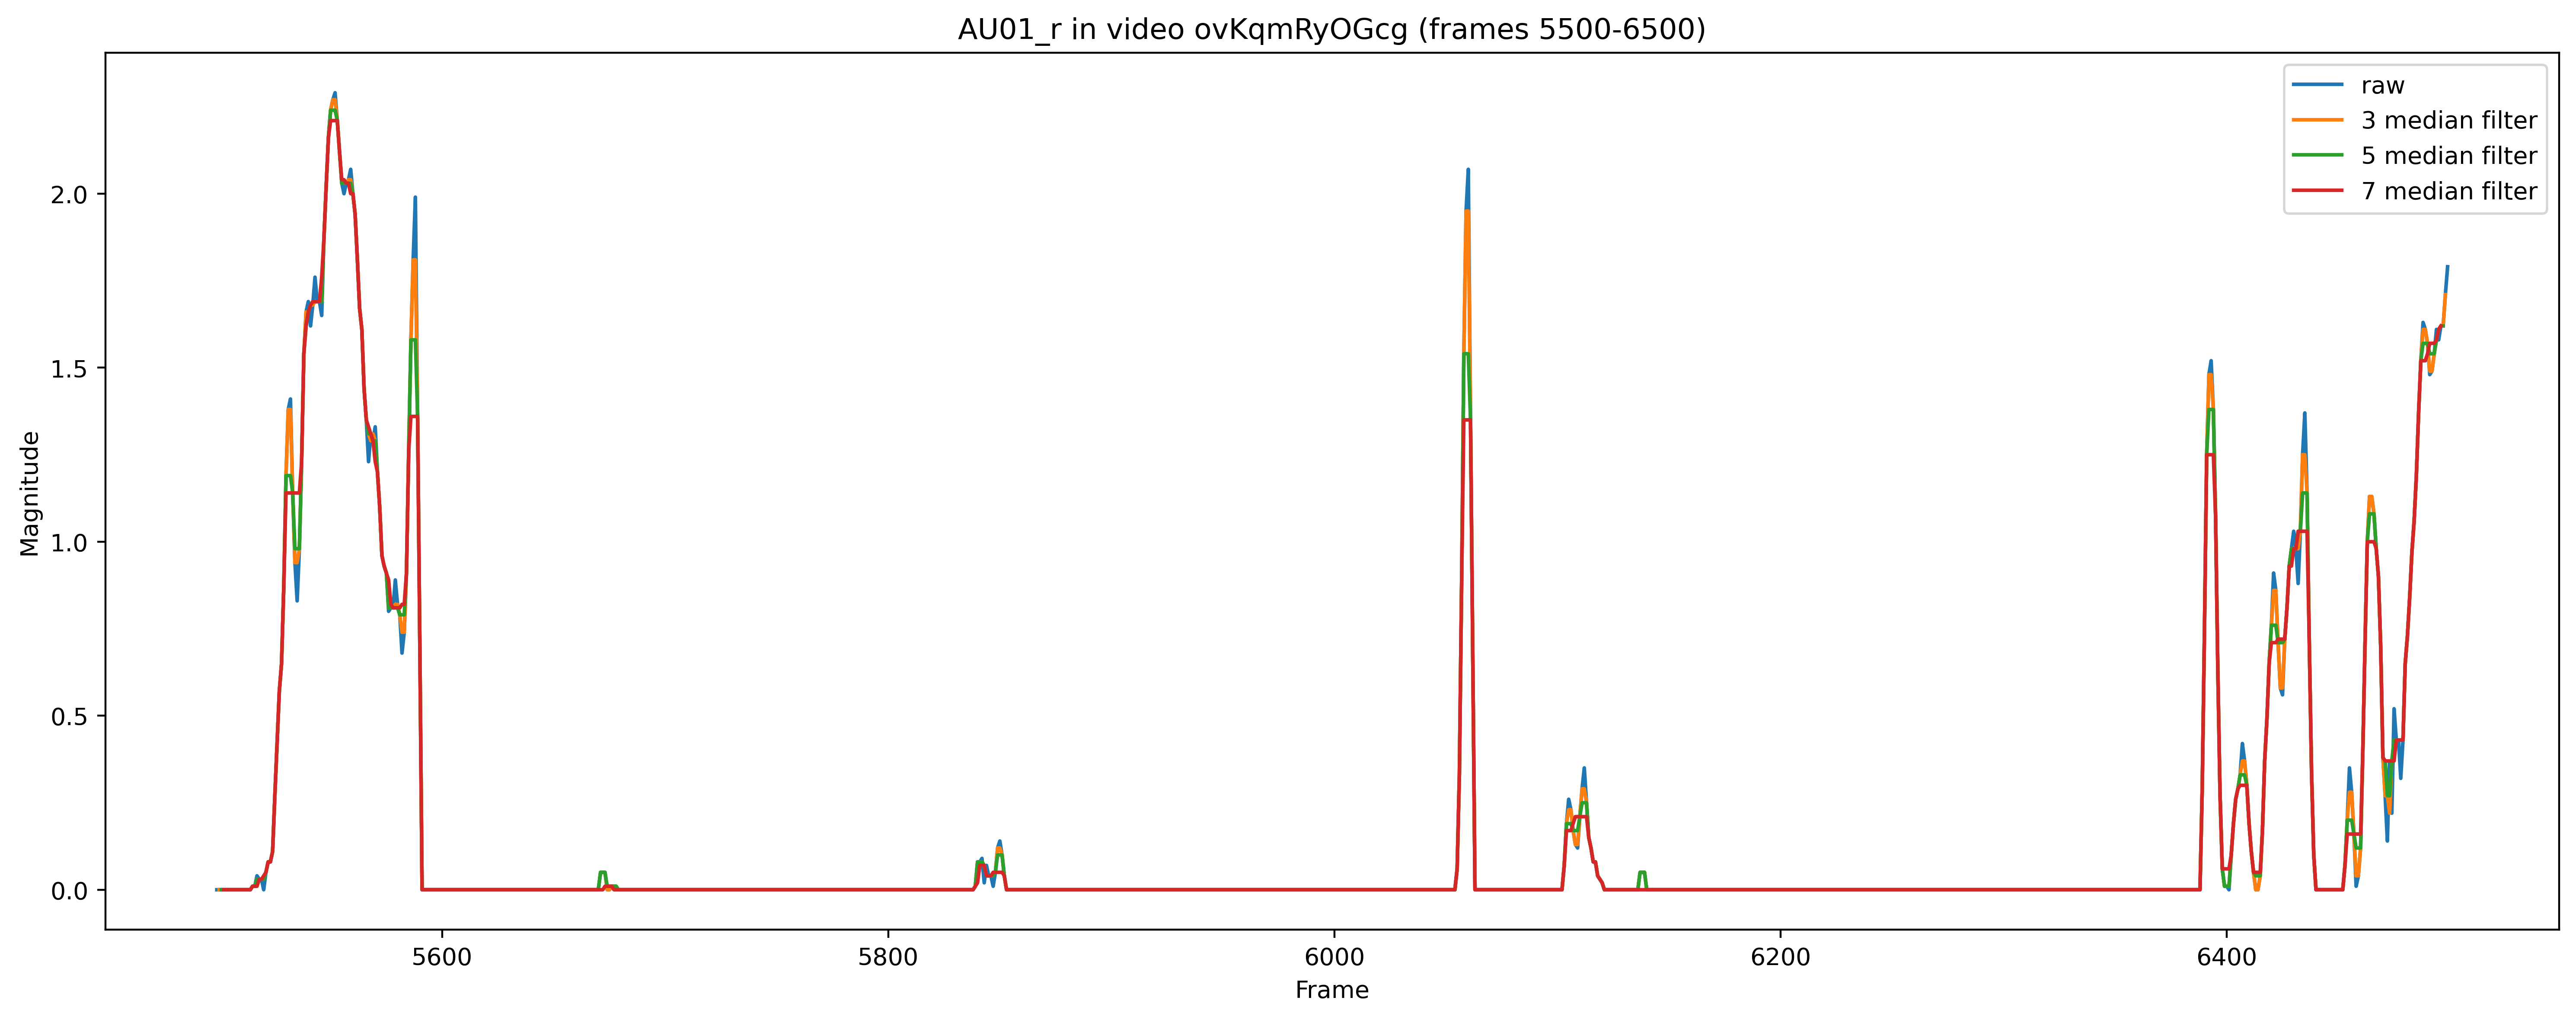

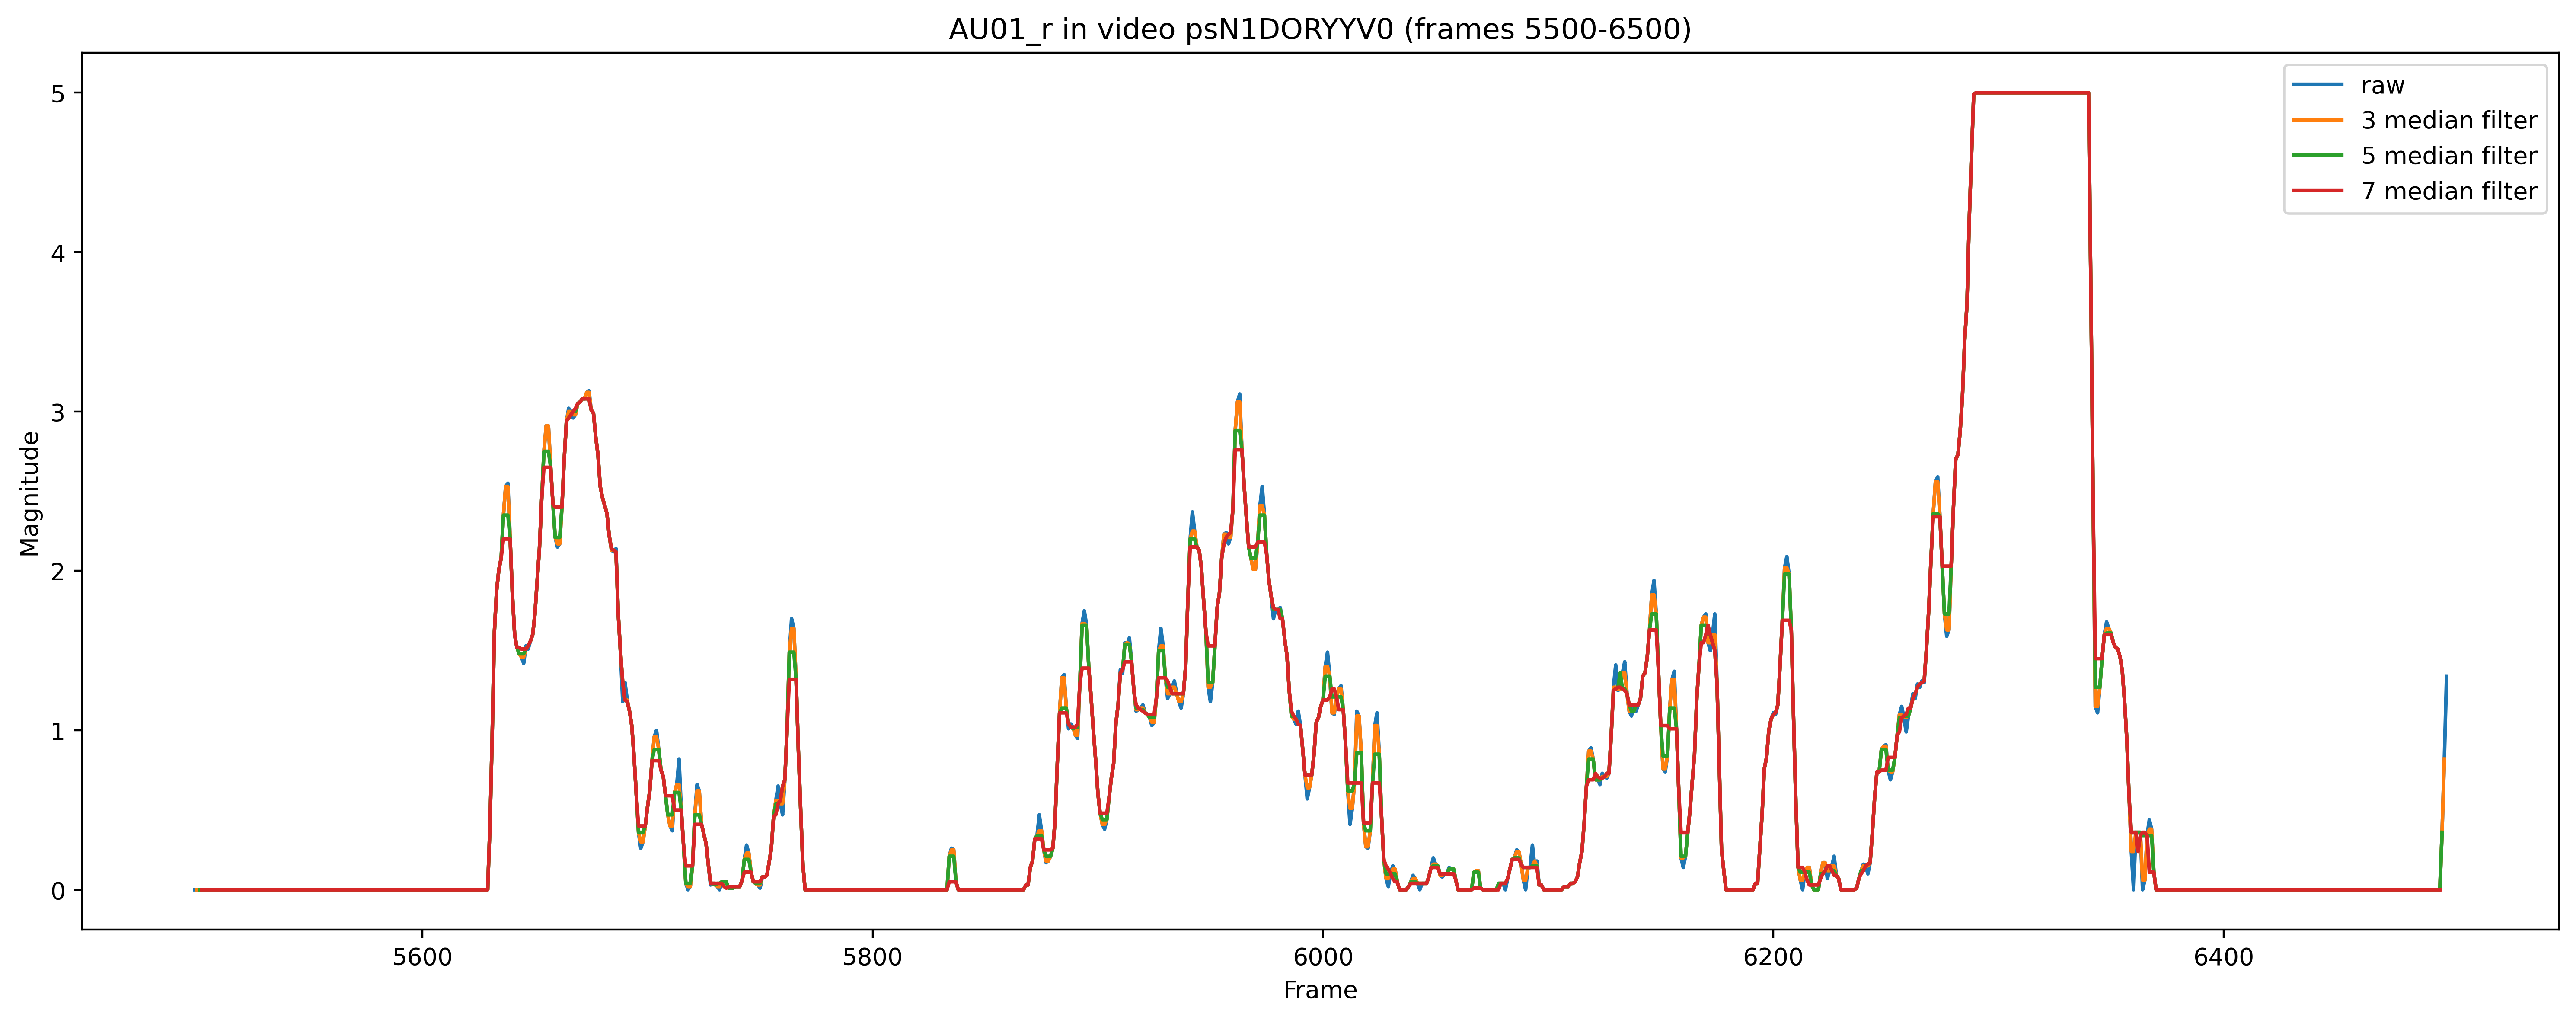

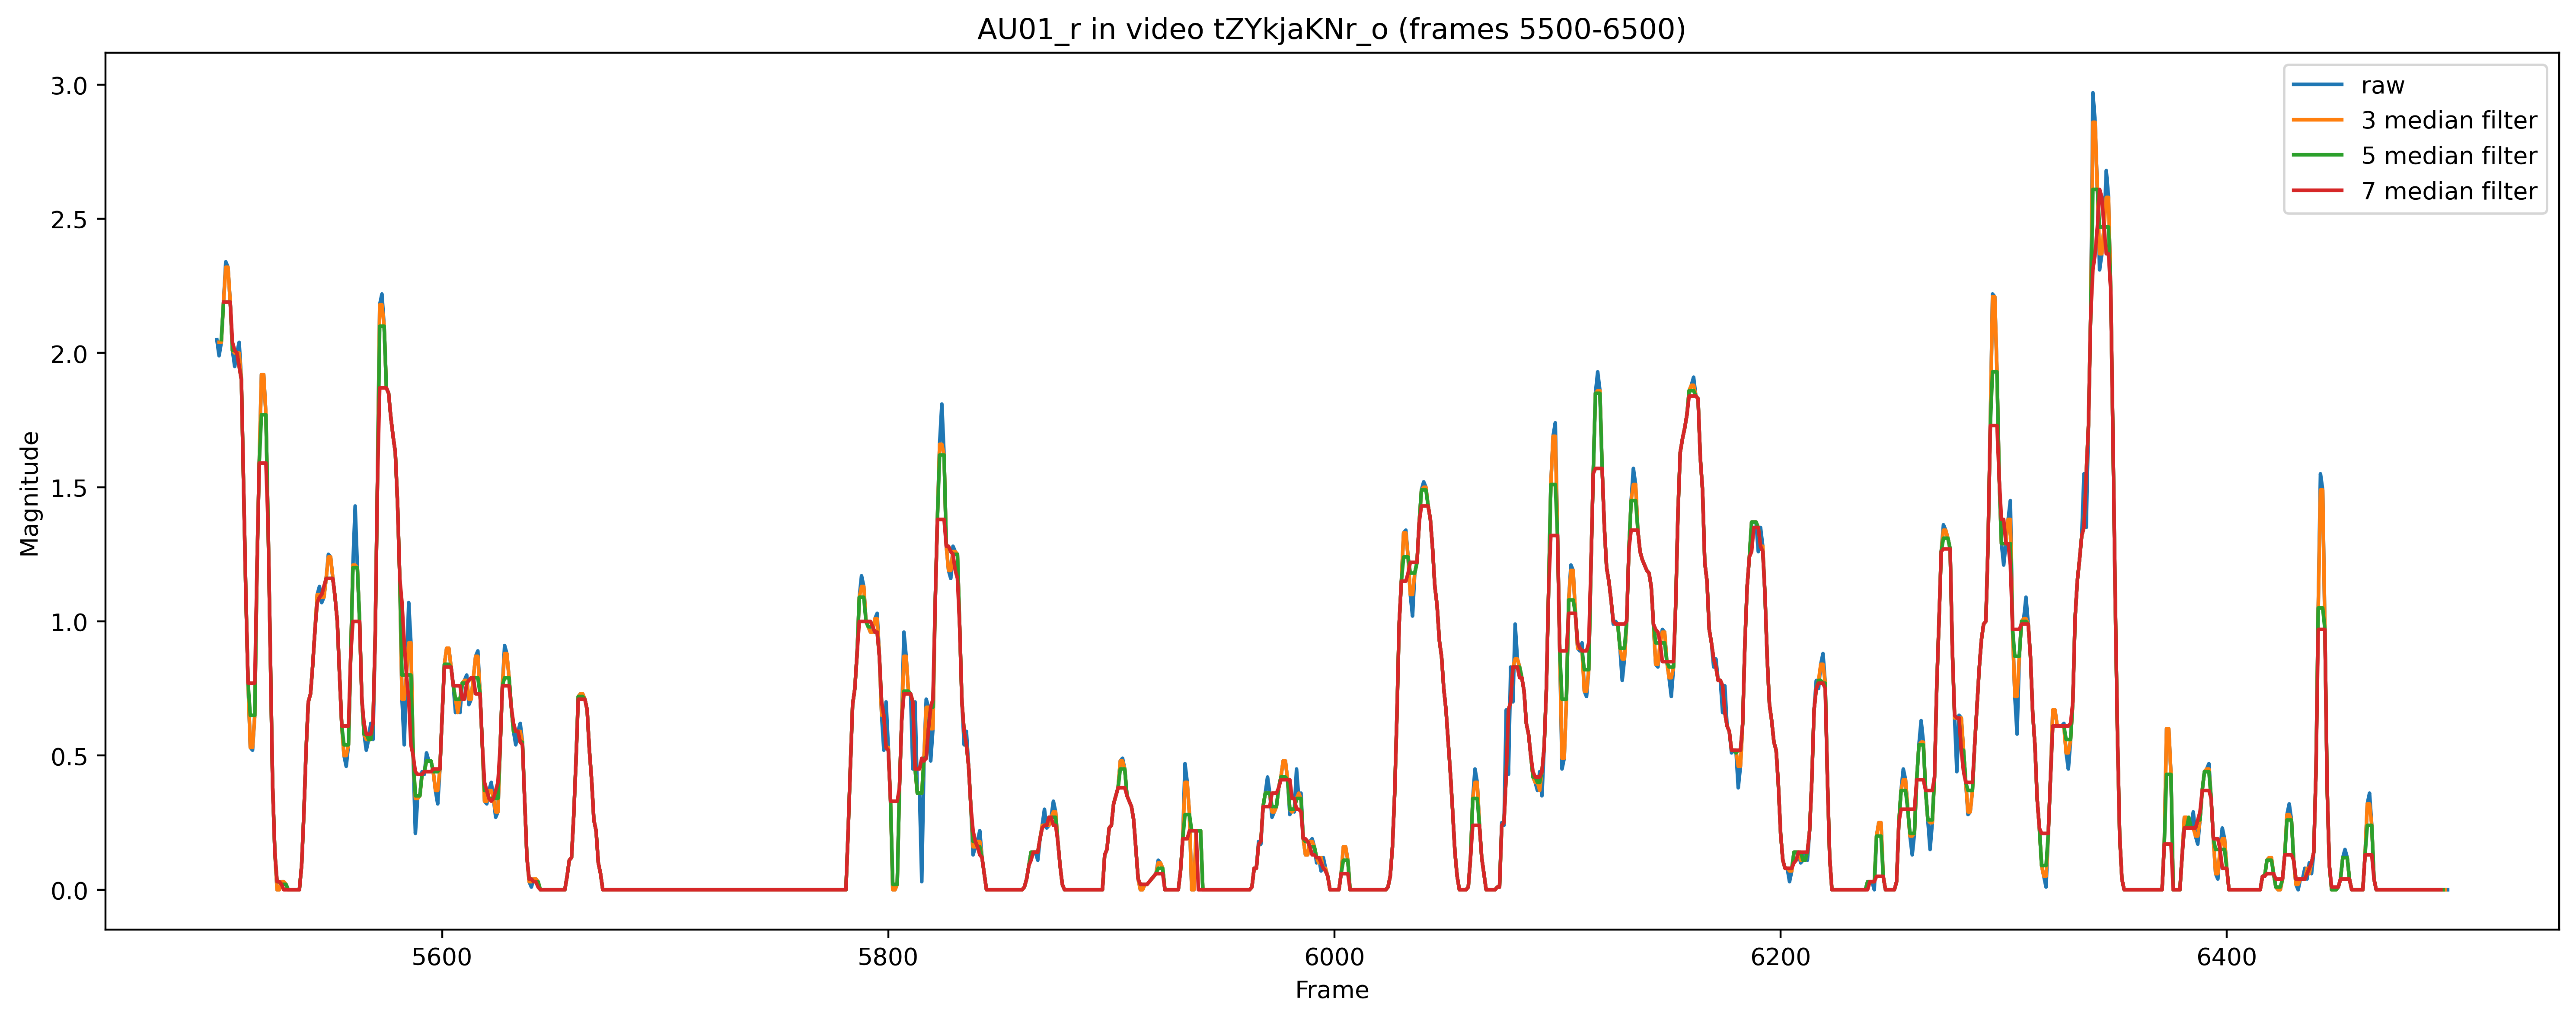

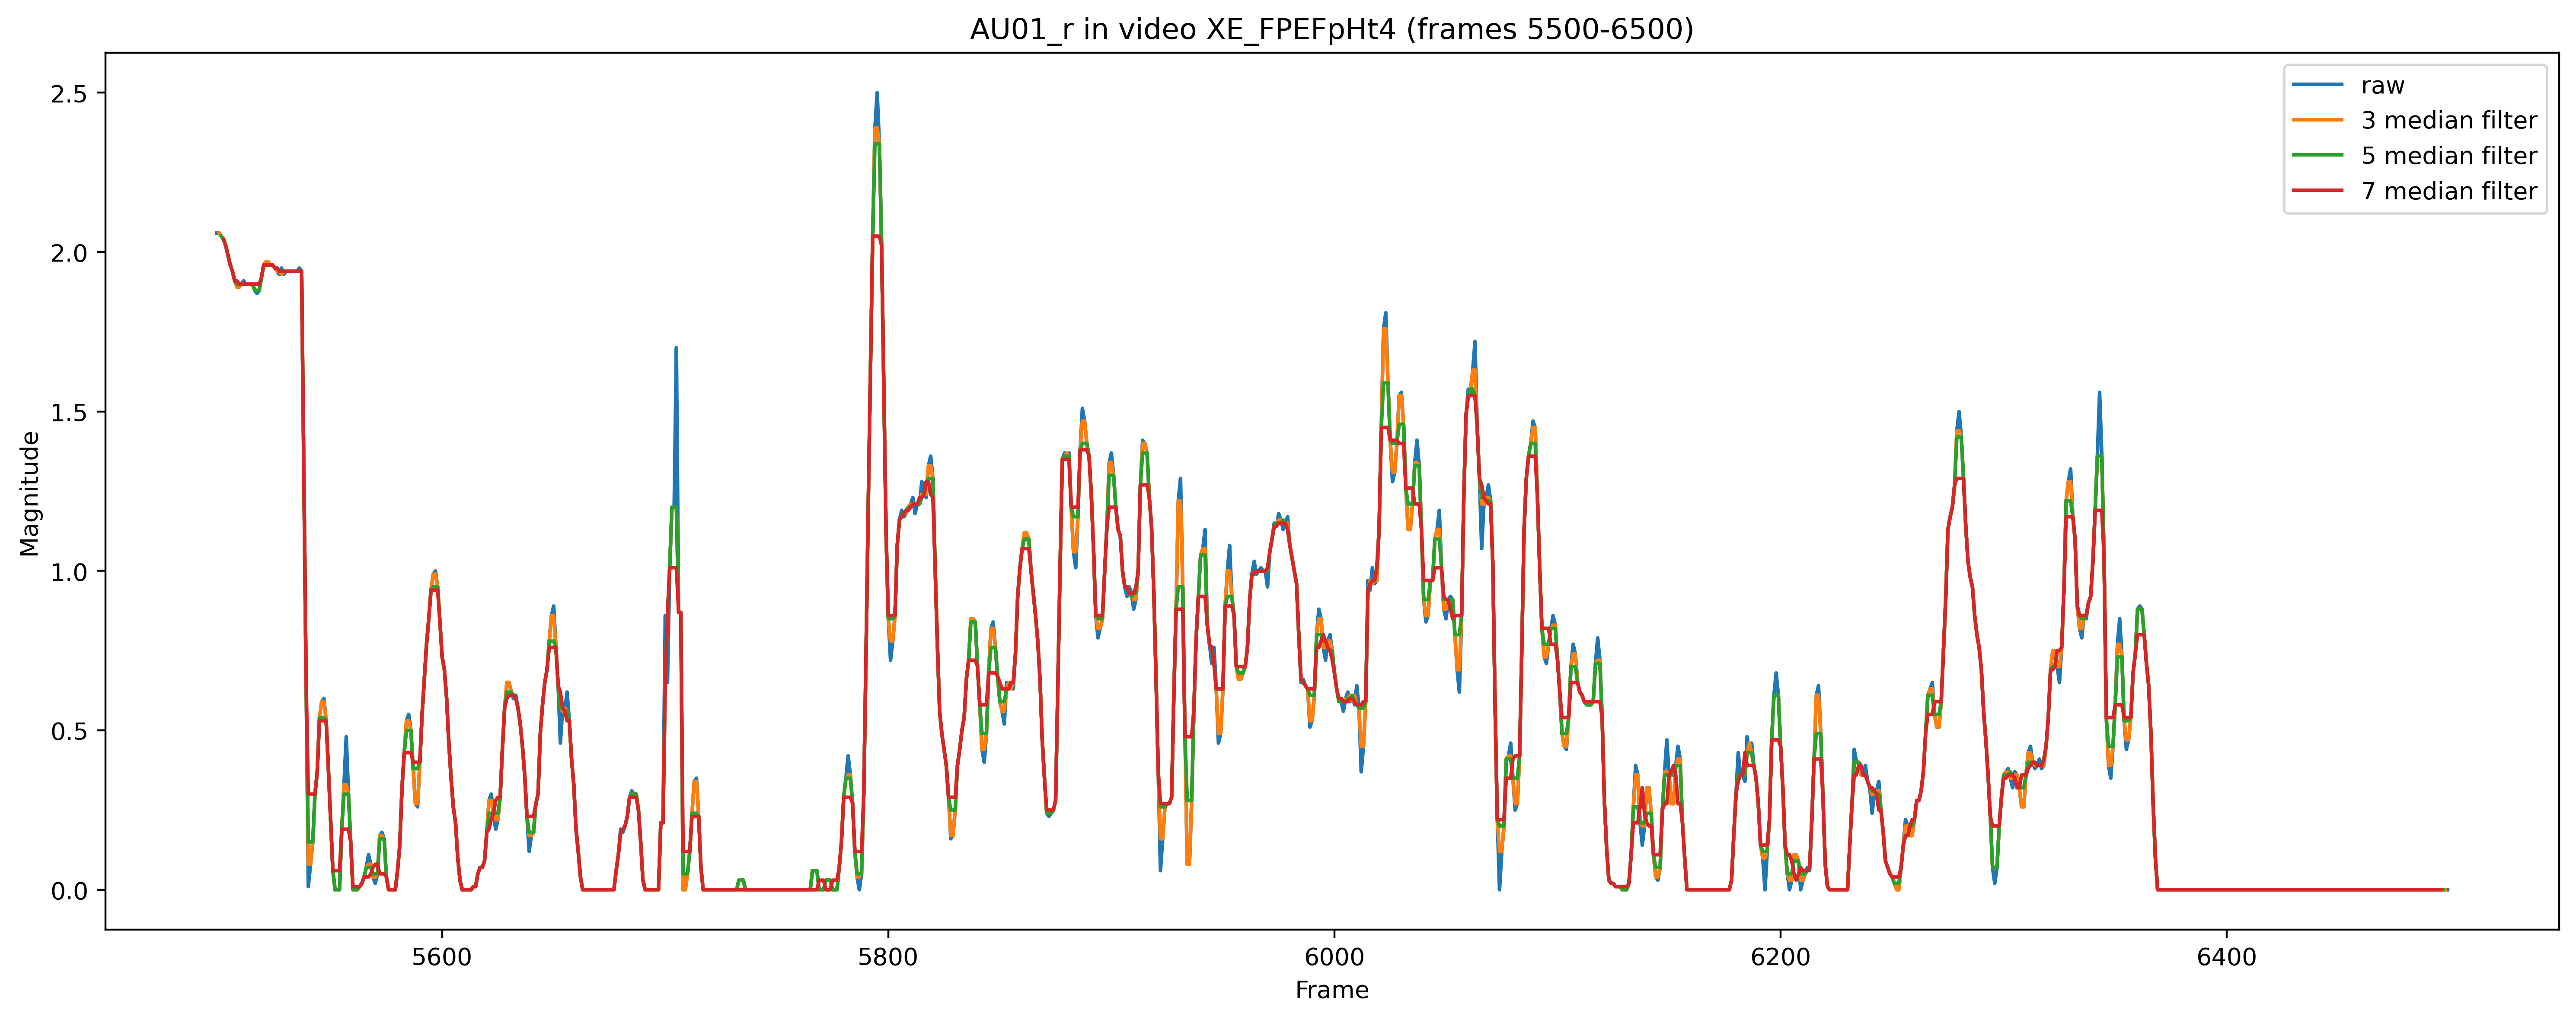

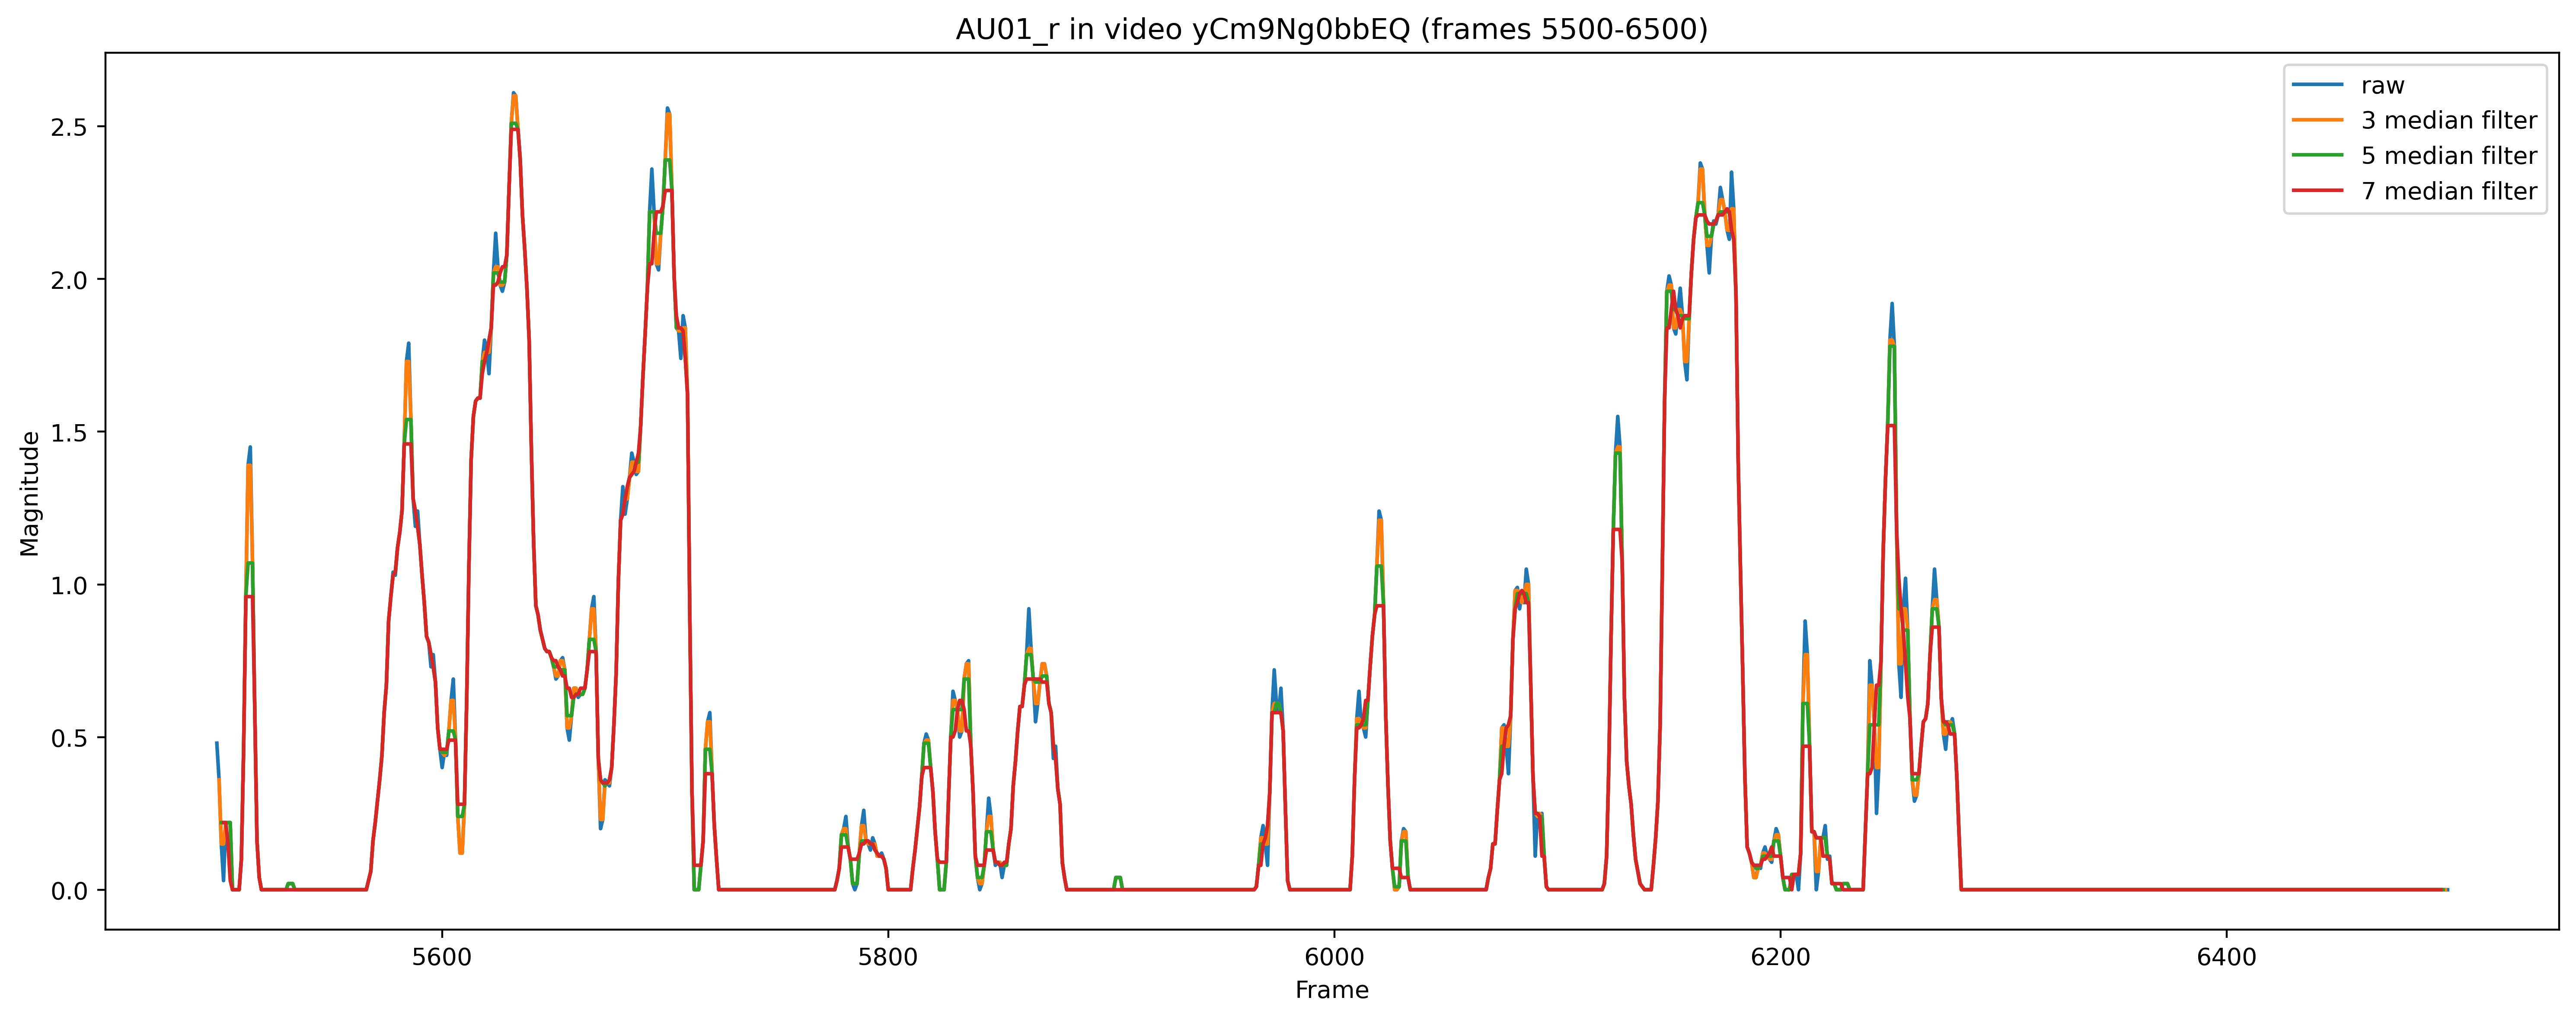

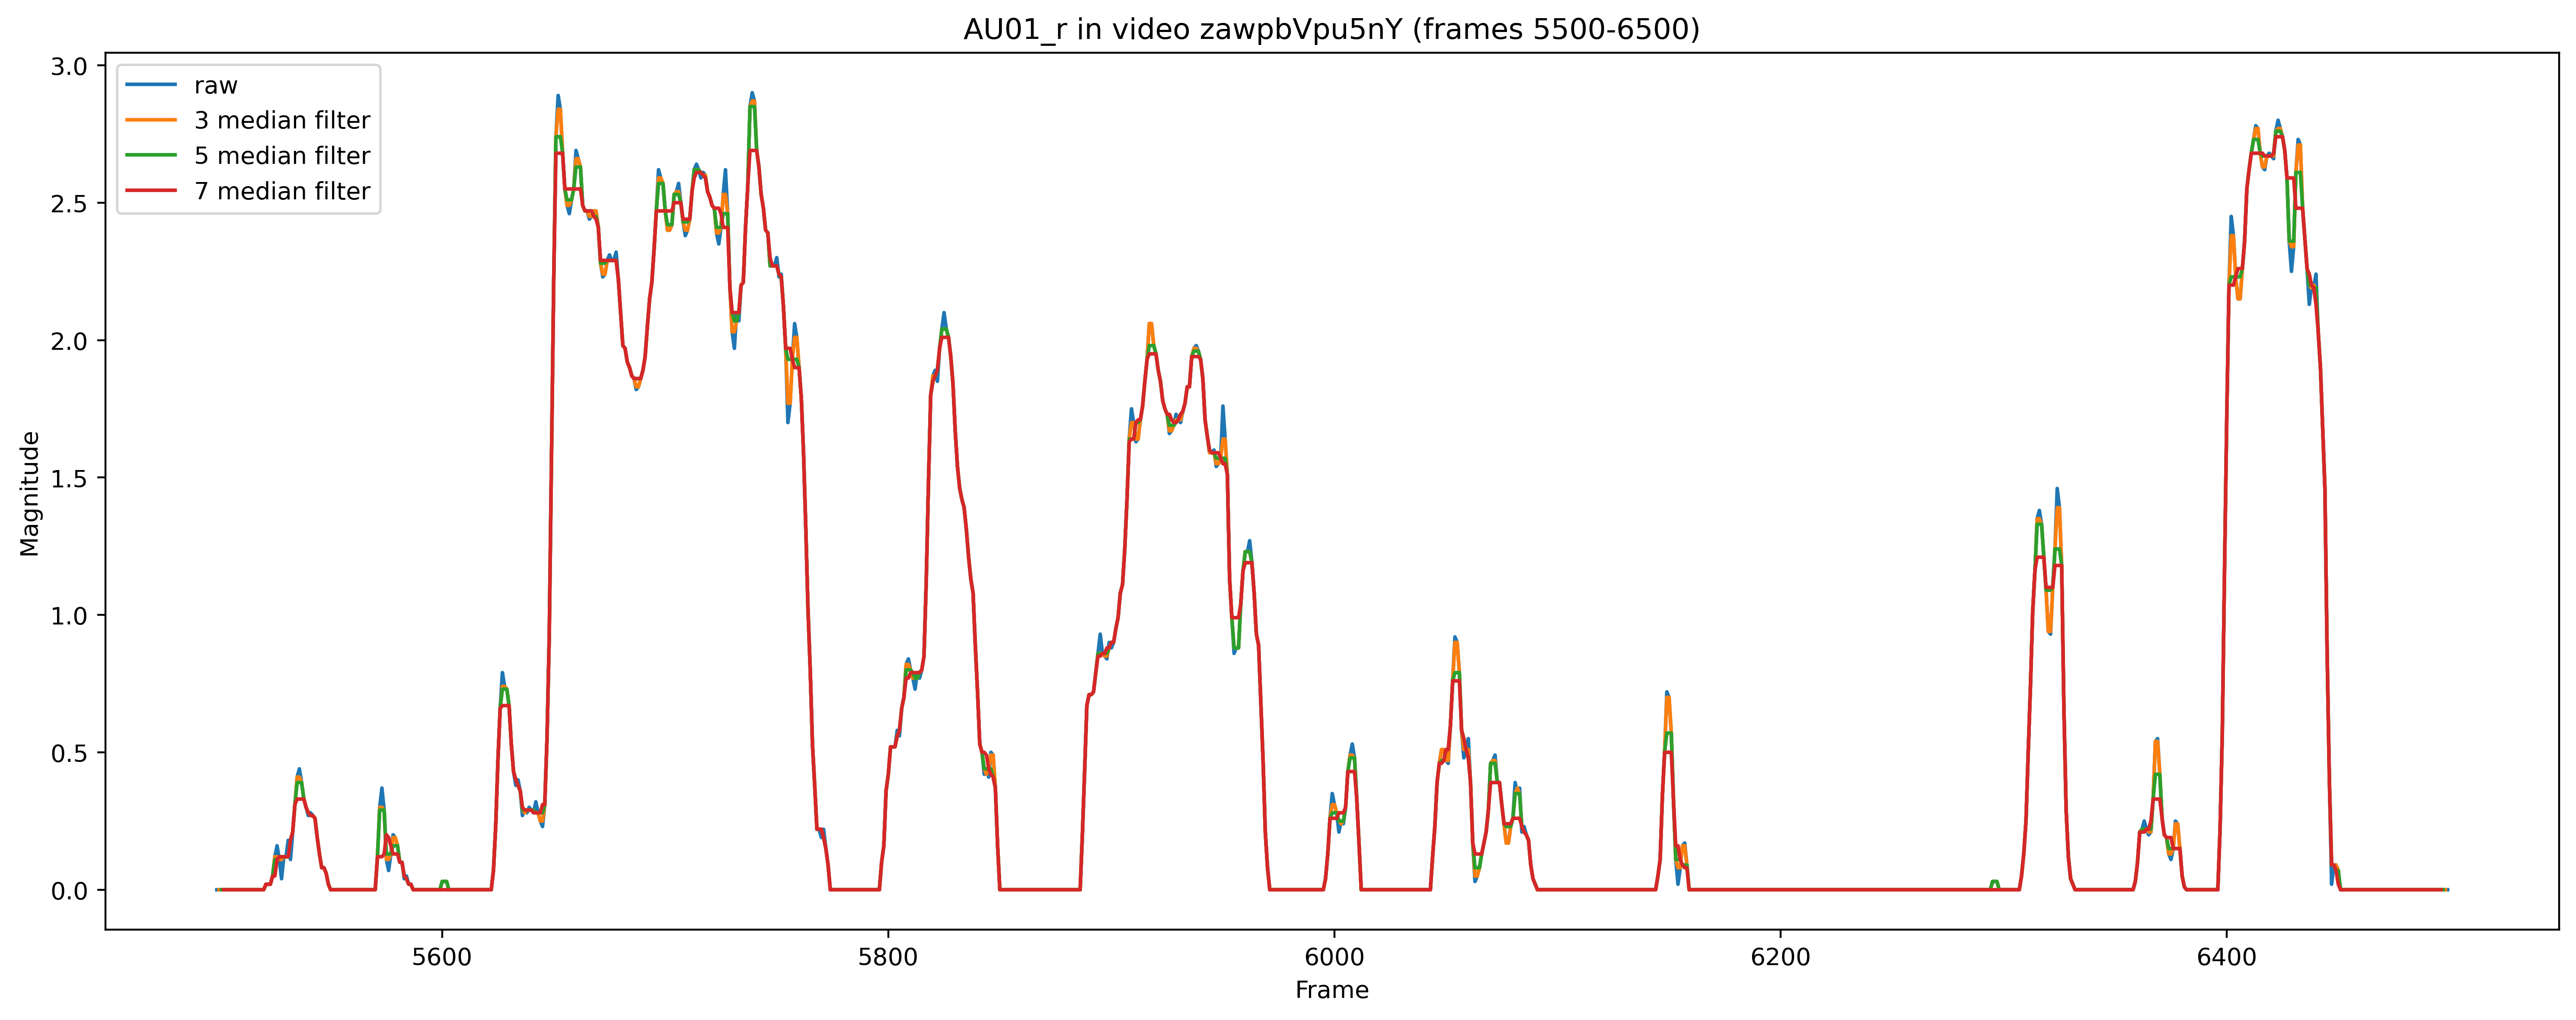

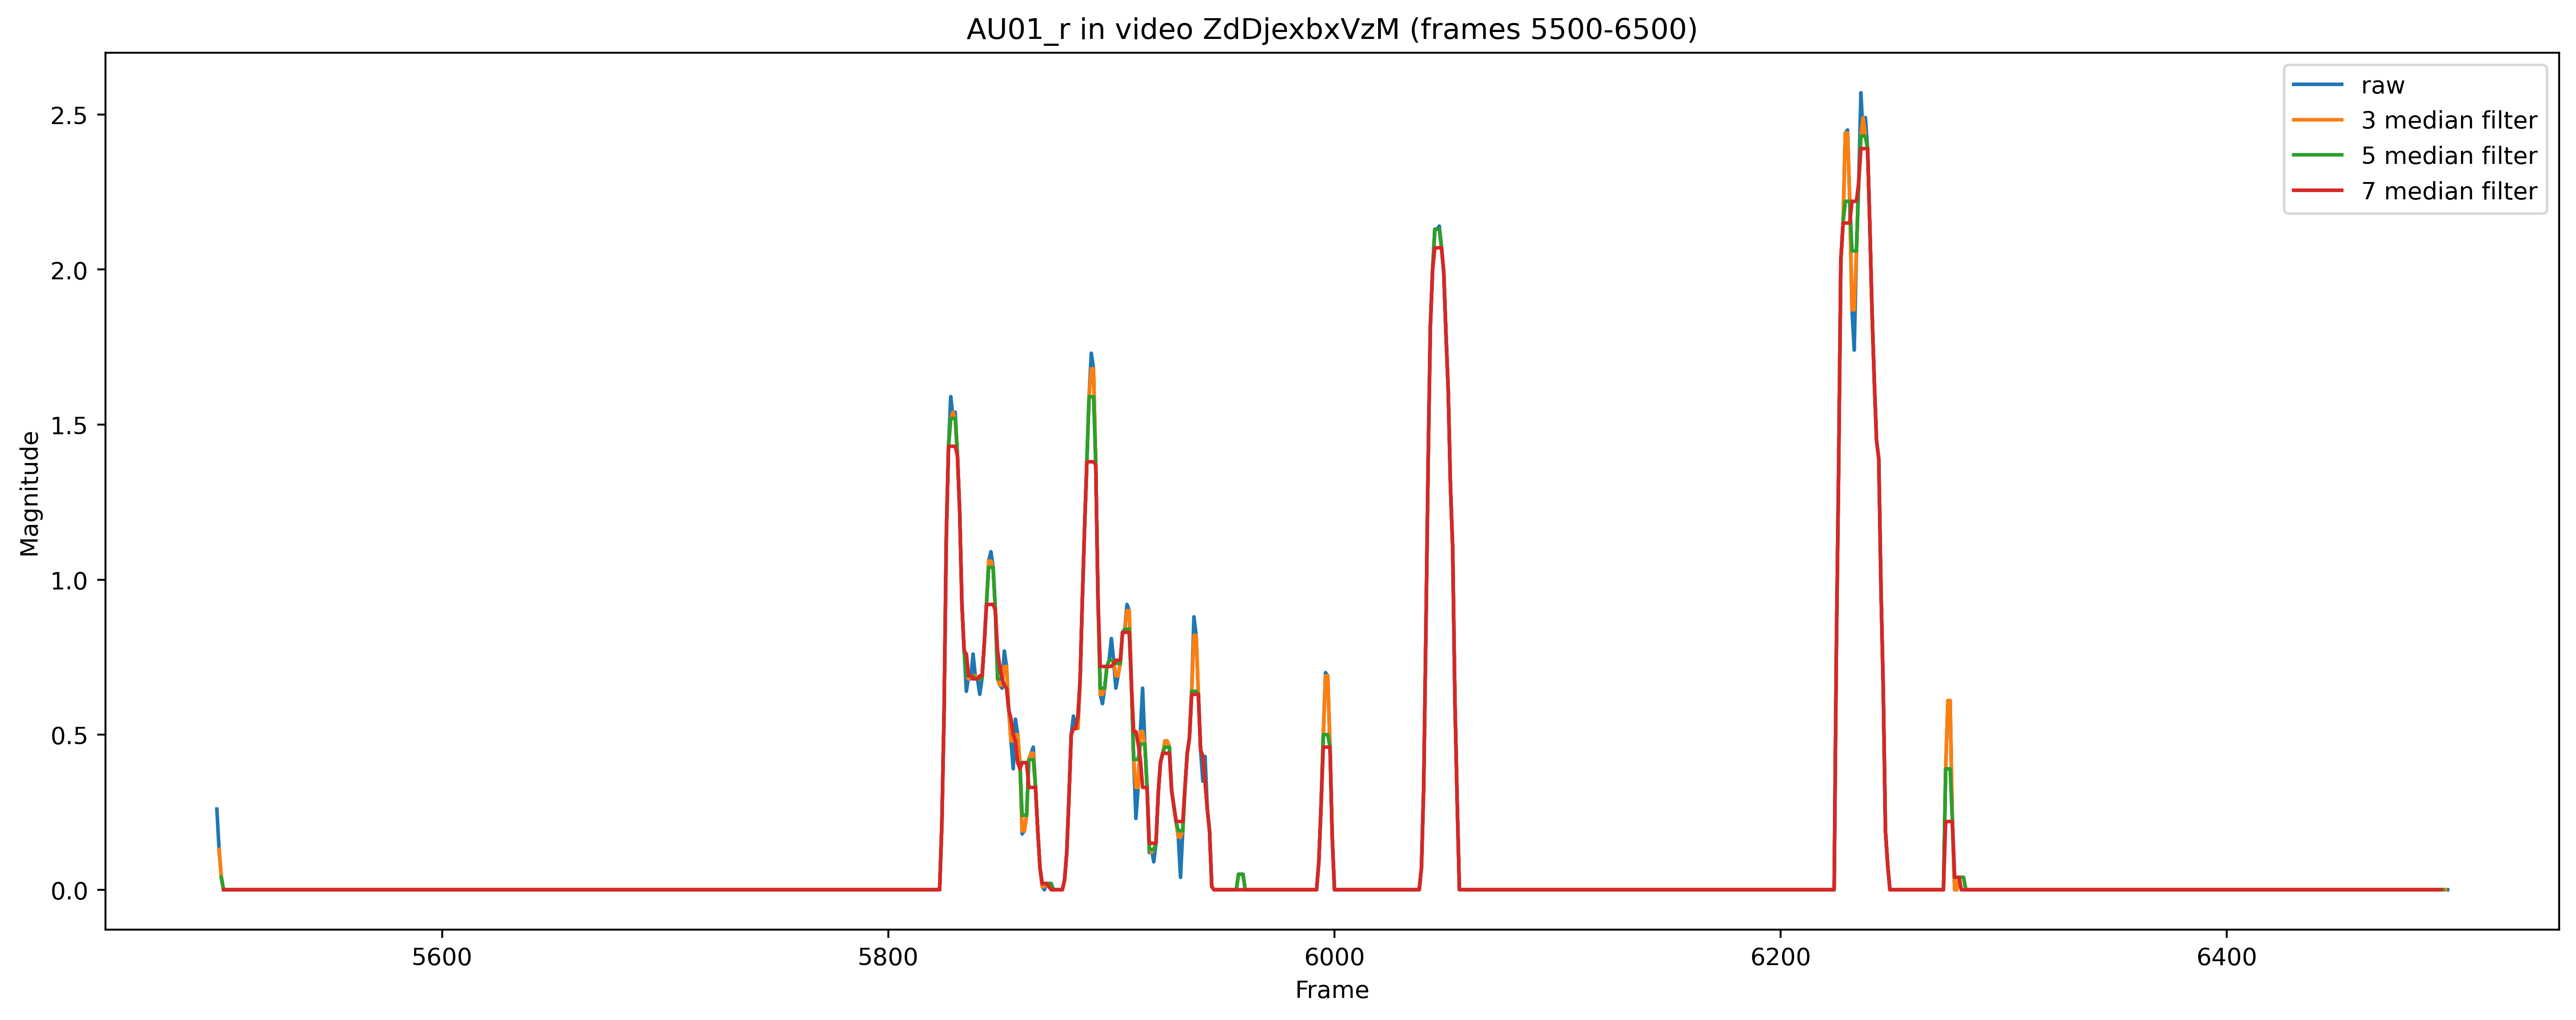

In [6]:
for i, vid_id in enumerate(video_ids):
    df_i = dfs[i]
    plot_AU(df_i, vid_id, plot_window=[5500, 6500], AU='01_r', median_filters=[3, 5, 7])

## Audio feature analysis